In [22]:
import numpy as np

from TraceSimulator import TraceSimulator
from trace_IO import *
from OptimumFilter import *
from OF import *
import matplotlib.pyplot as plt


In [23]:
sampling_frequency = 3906250
template_1 = np.load("./sub_ch_template.npy")
template_2 = np.load("./vac_ch45_low_eng.npy")
template_3 = np.load("./vac_ch46plus_low_eng.npy")
noise_psd = np.load("../templates/noise_psd_from_MMC.npy")

# Initialize Optimum Filter
trigger_1 = OFtrigger(template_1, noise_psd, sampling_frequency)
trigger_2 = OFtrigger(template_2, noise_psd, sampling_frequency)
trigger_3 = OFtrigger(template_3, noise_psd, sampling_frequency)


In [16]:
loaded_traces = load_traces_from_zstd("/ceph/dwong/trigger_samplesMMC_noise_1000.zst", n_traces=1000)
loaded_traces.shape

(1000, 54, 32768)

In [24]:
traces = loaded_traces[0]
amps = np.zeros(54)
chisqs = np.zeros(54)
t0s = np.zeros(54, dtype=int)

for ch in range(54):
    if ch <= 44:
        amp, chisq= trigger_1.fit(traces[ch])
    elif ch == 45:
        amp, chisq= trigger_2.fit(traces[ch])
    else:
        amp, chisq= trigger_3.fit(traces[ch])

    amps[ch] = amp
    chisqs[ch] = chisq


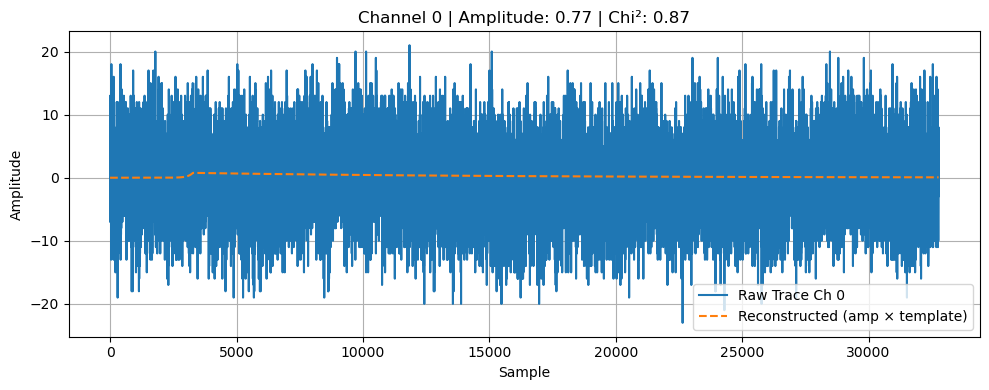

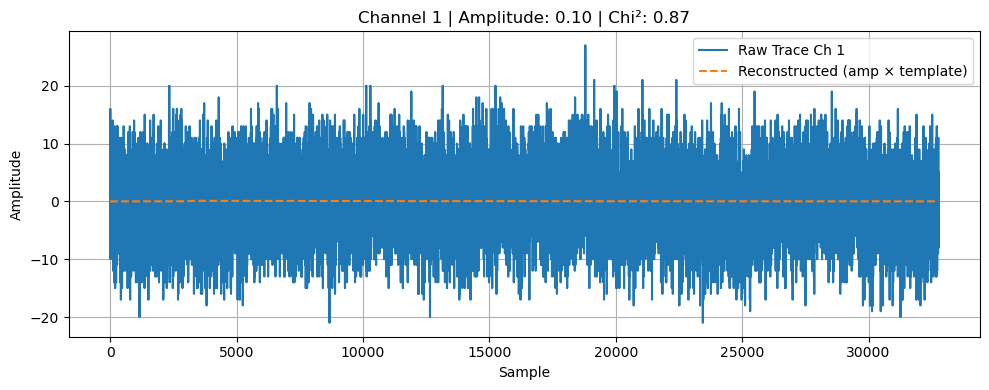

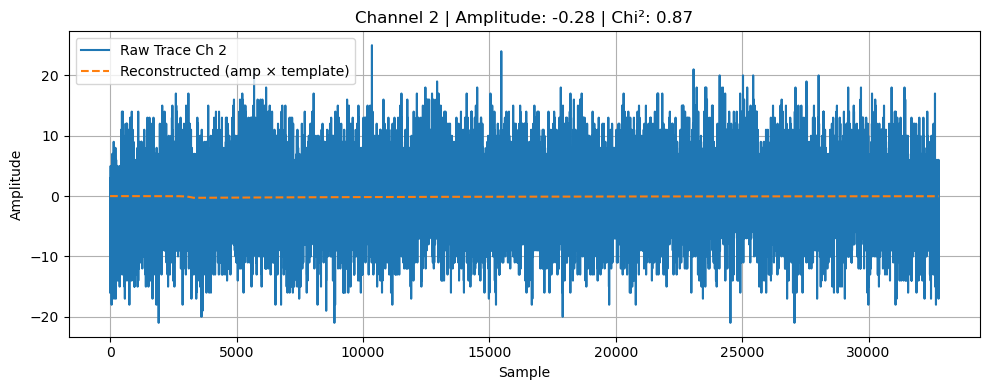

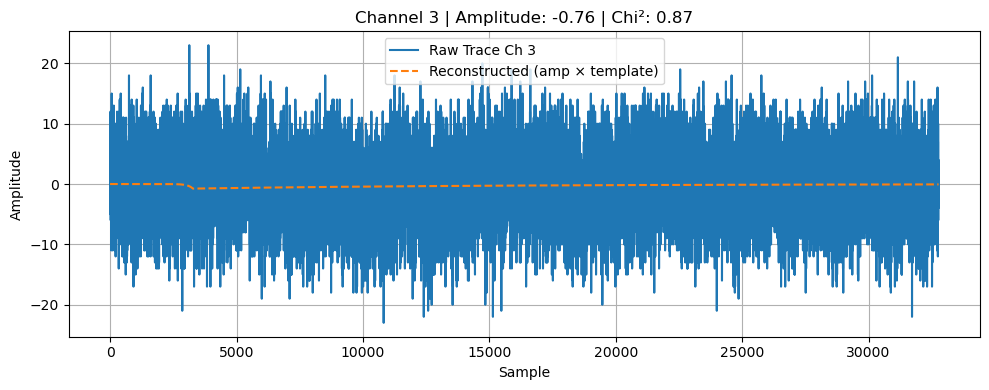

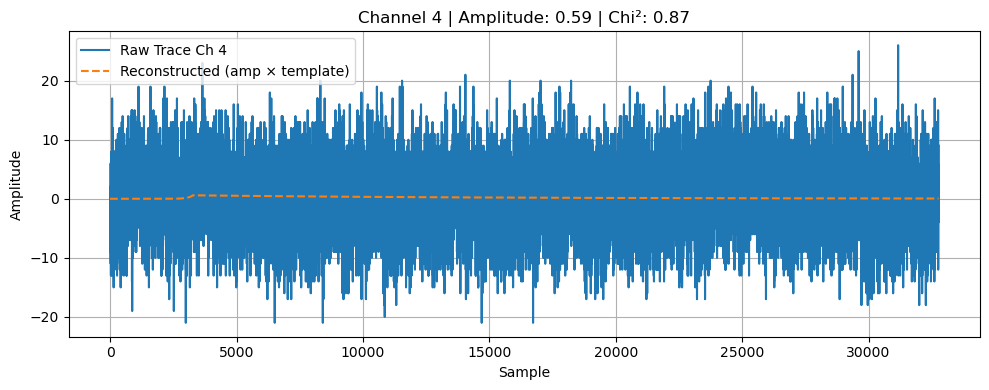

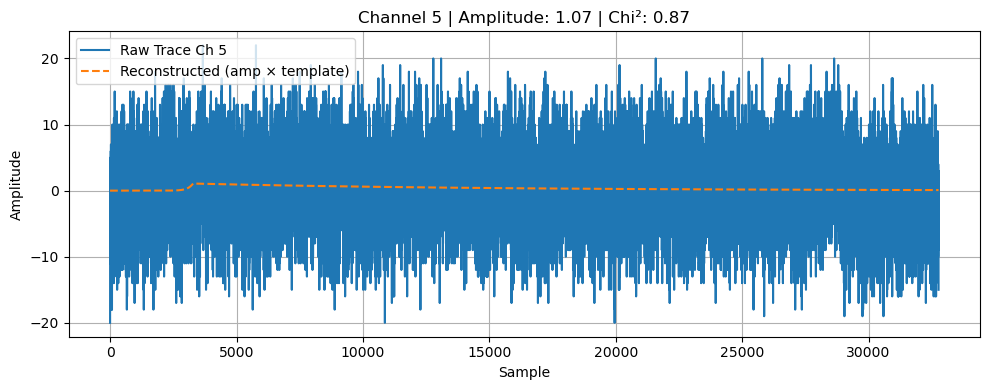

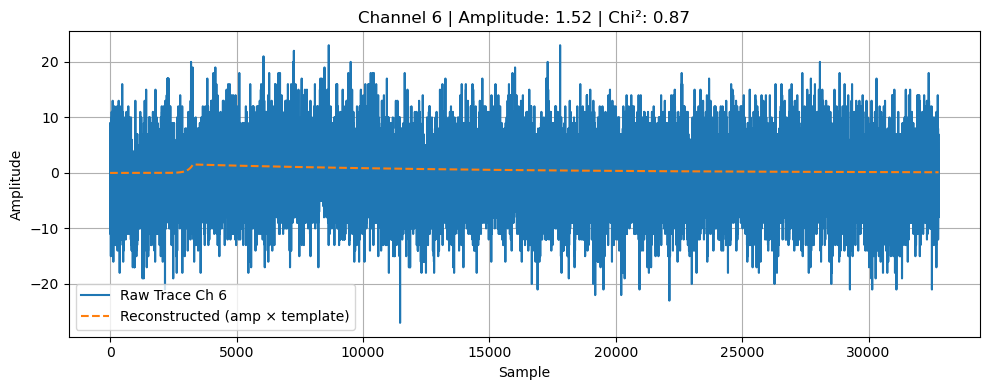

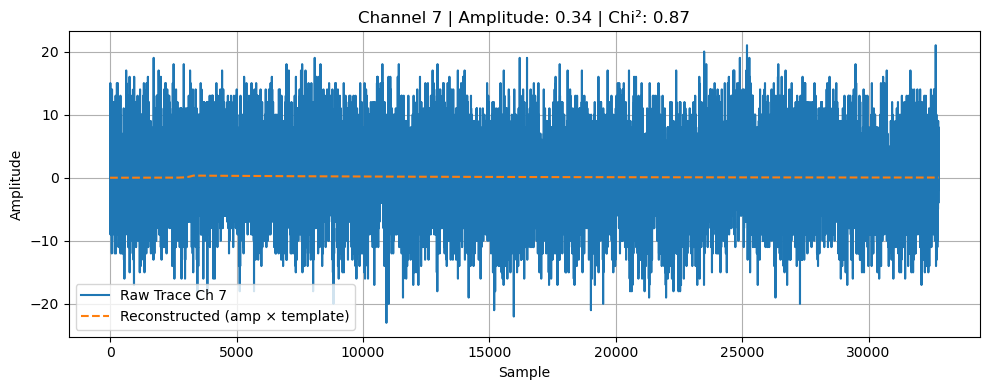

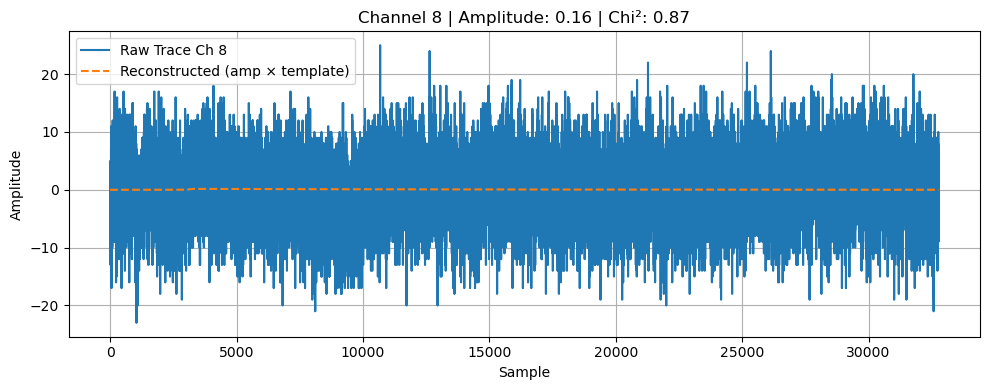

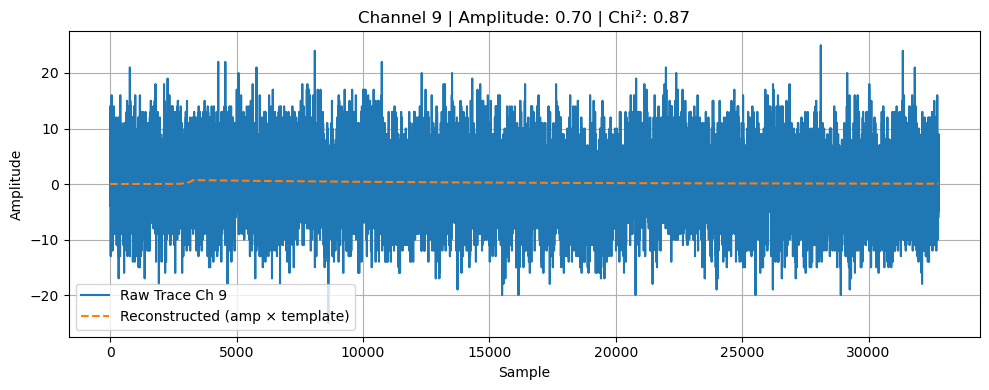

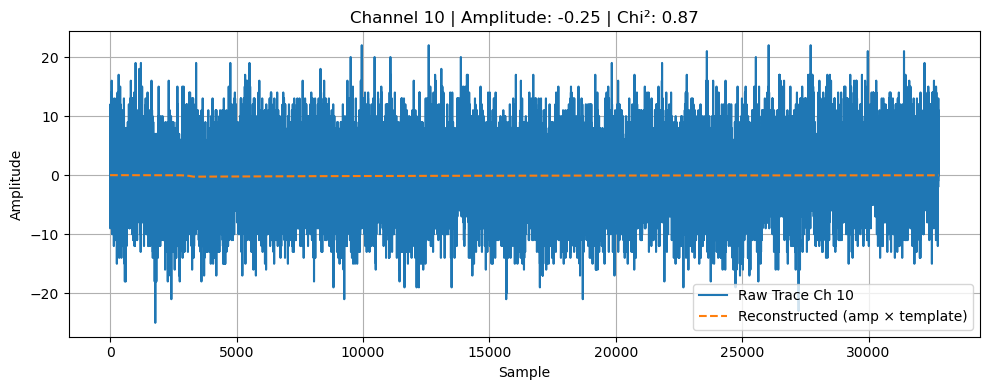

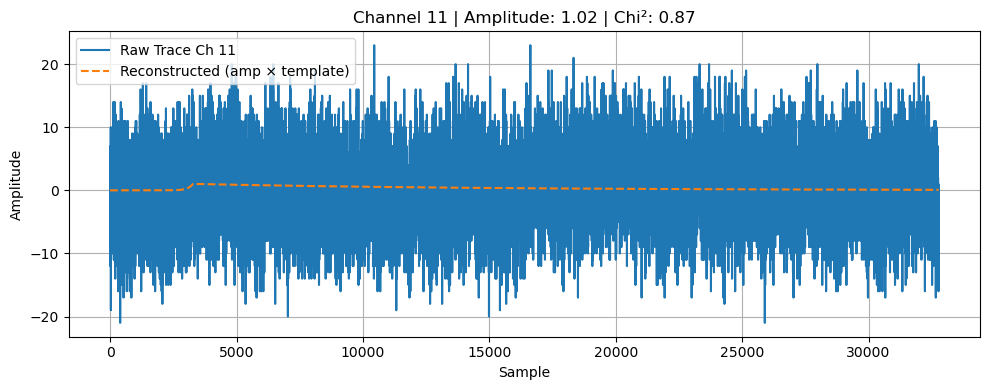

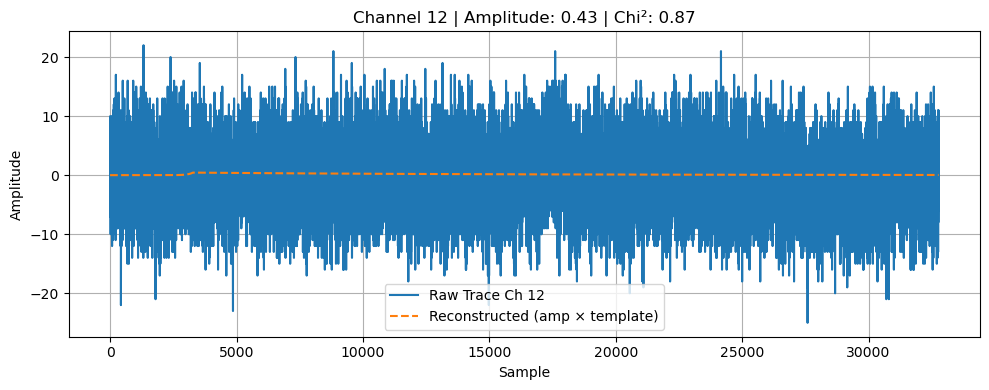

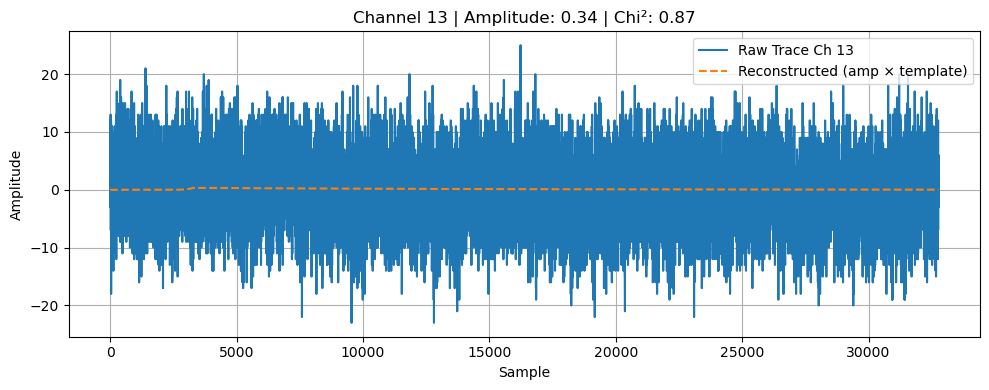

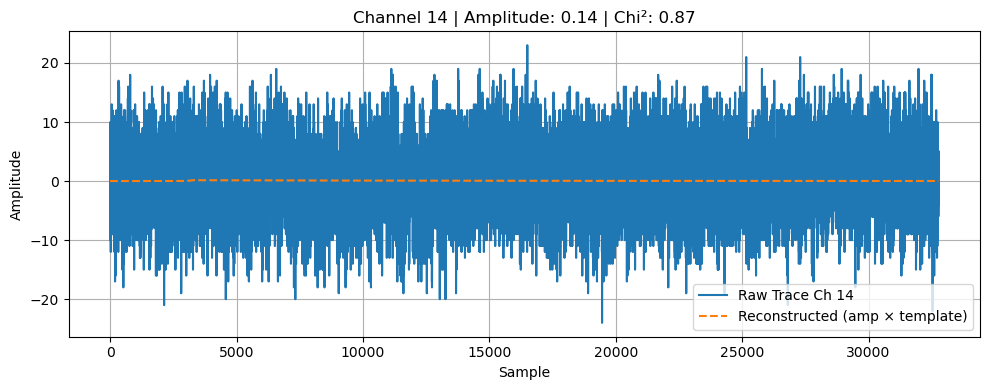

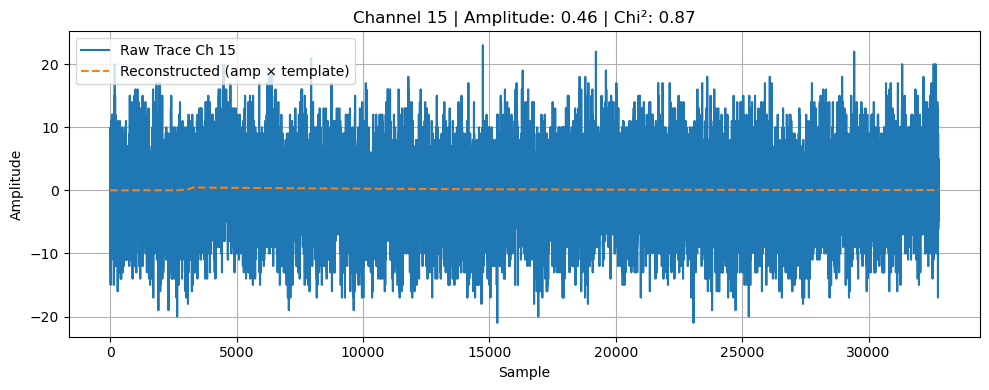

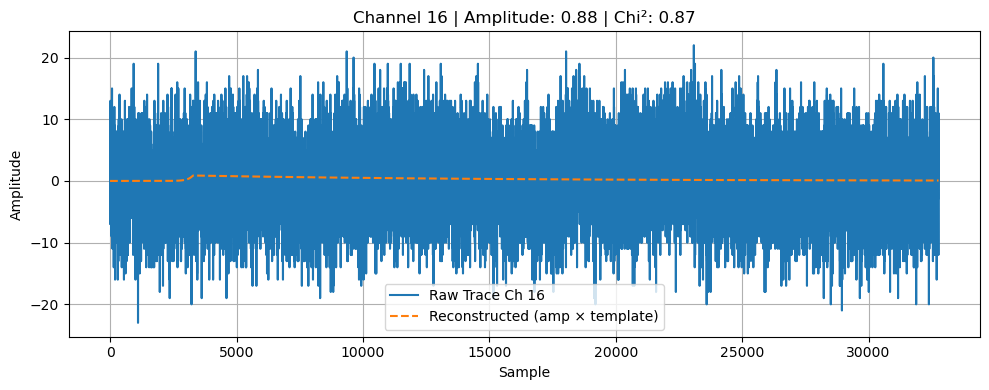

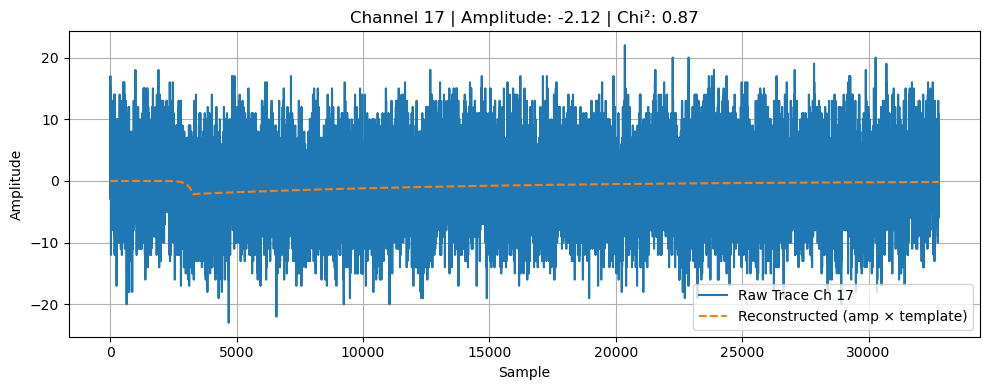

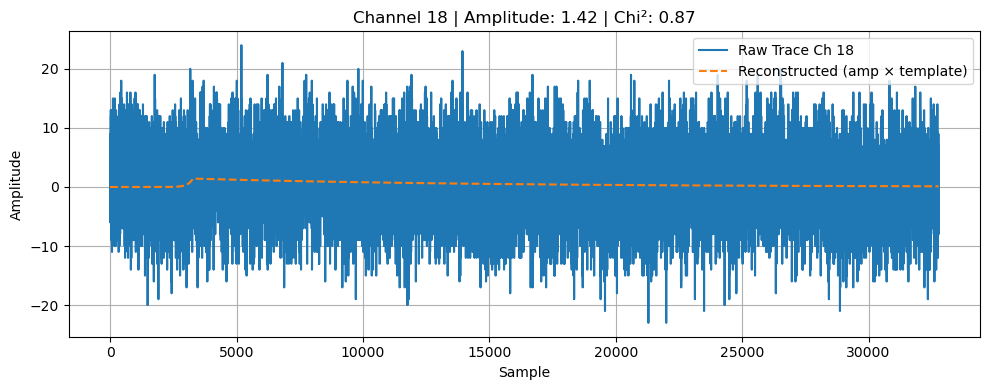

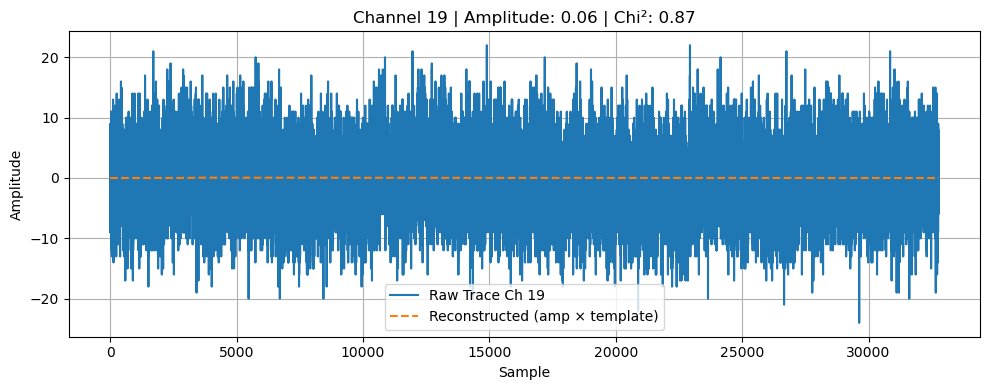

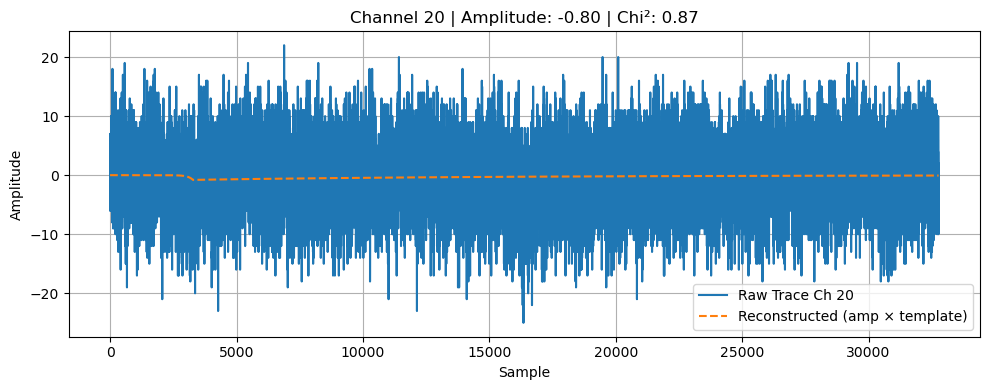

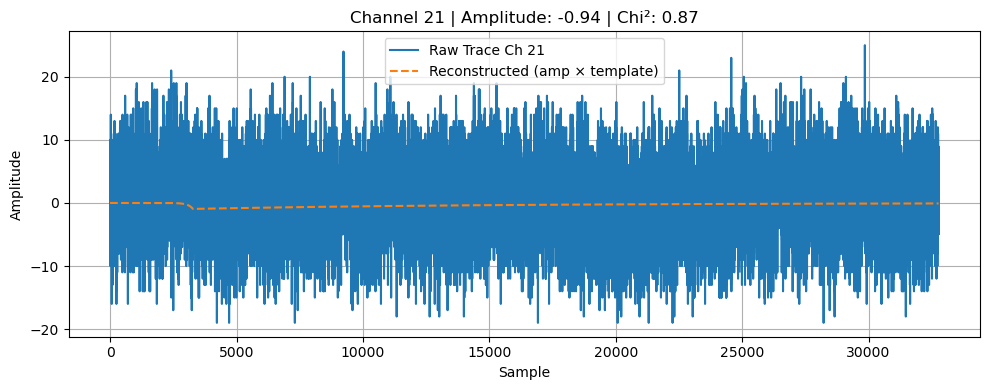

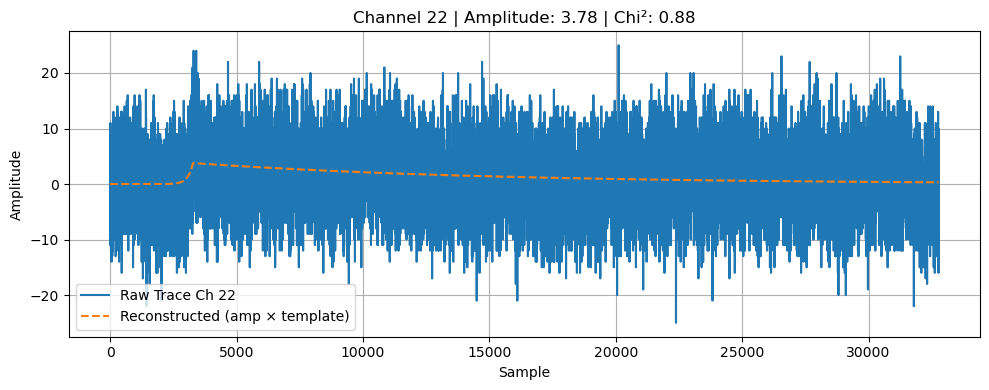

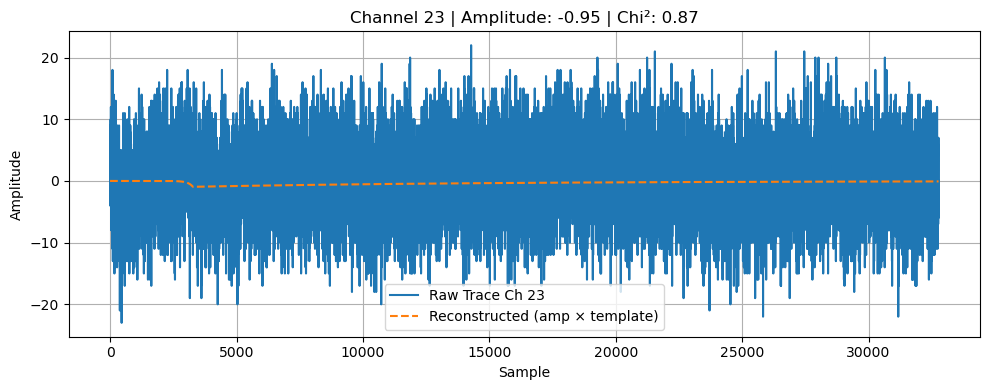

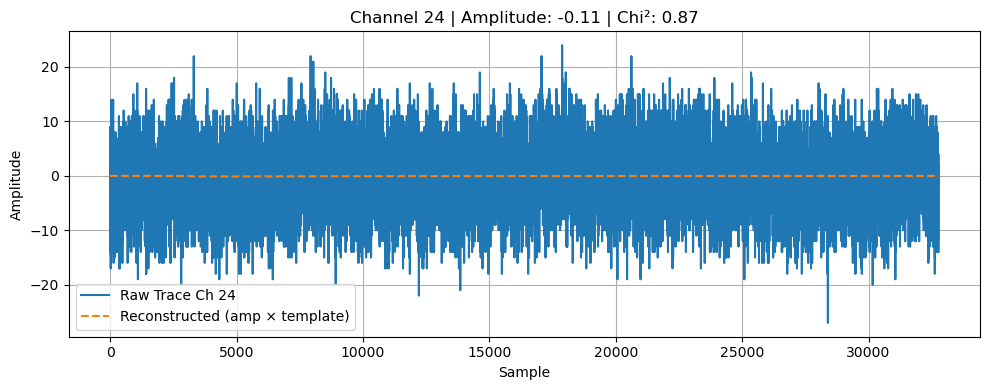

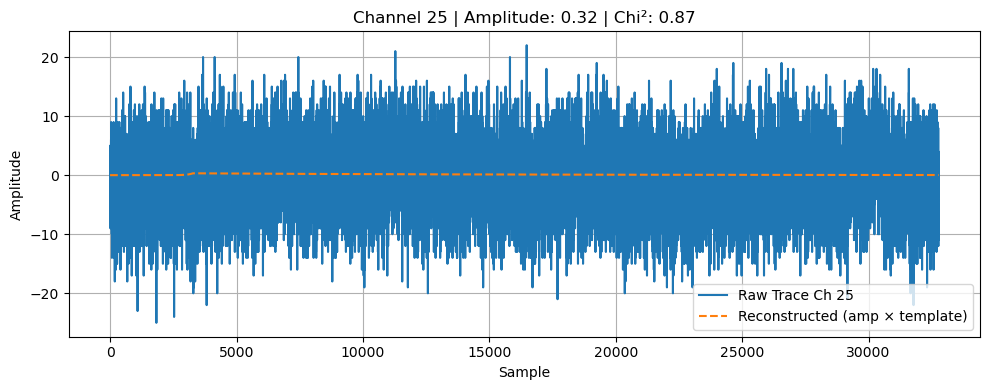

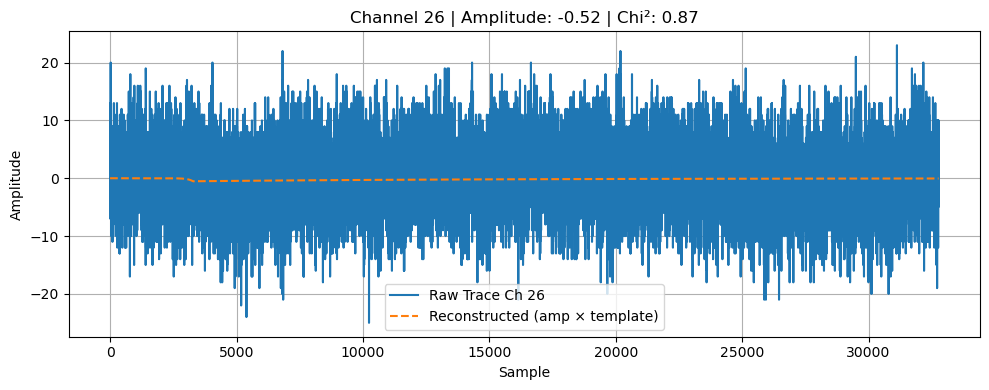

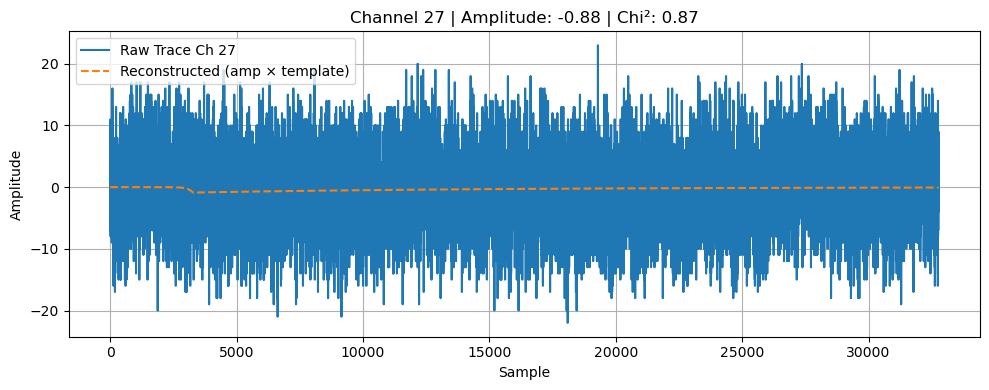

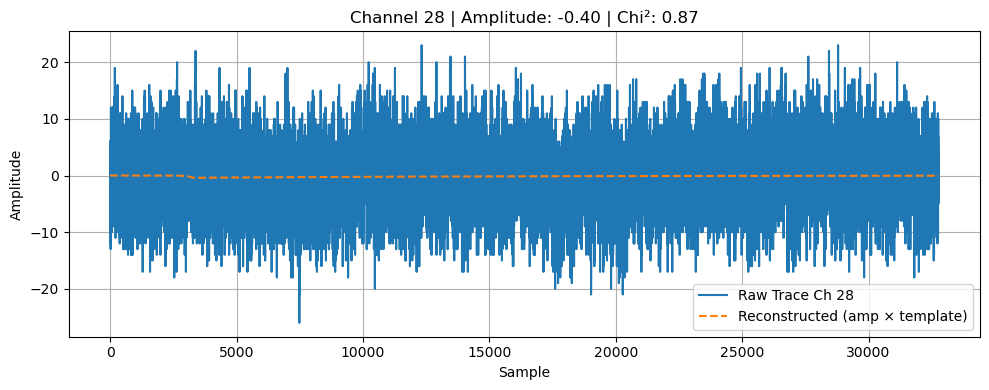

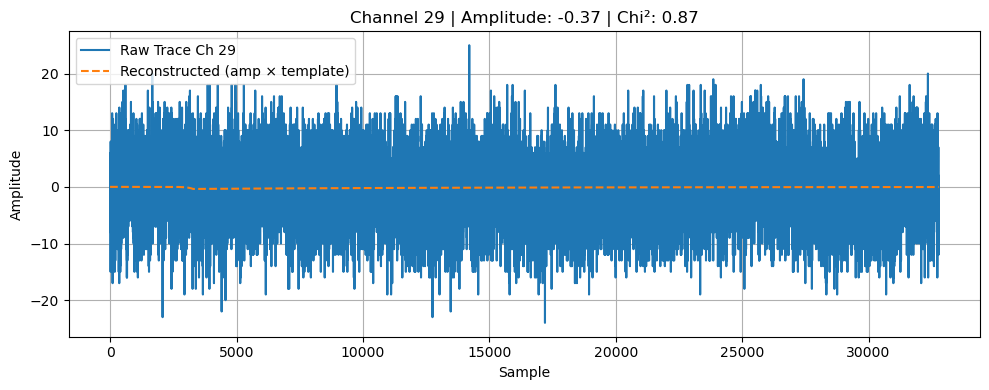

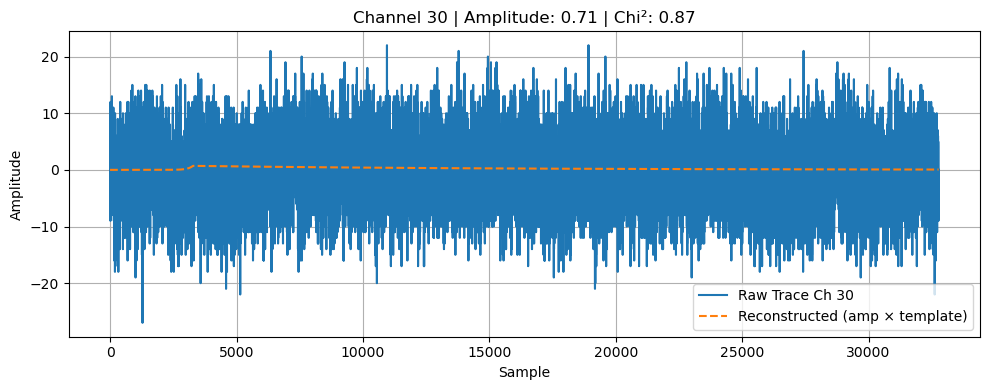

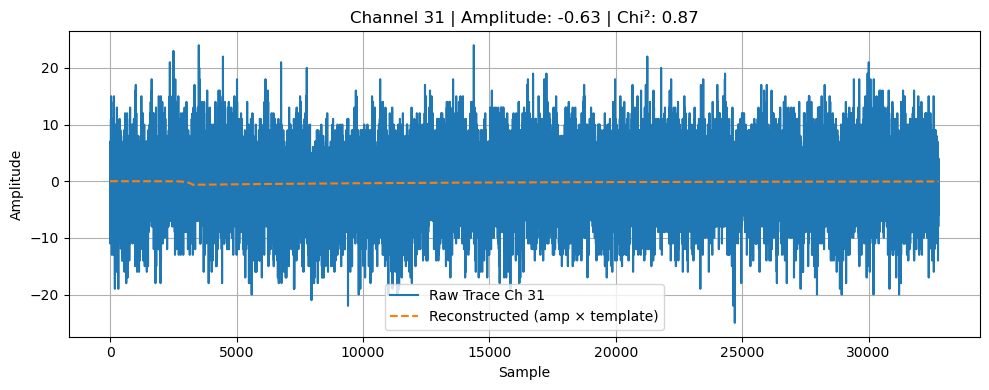

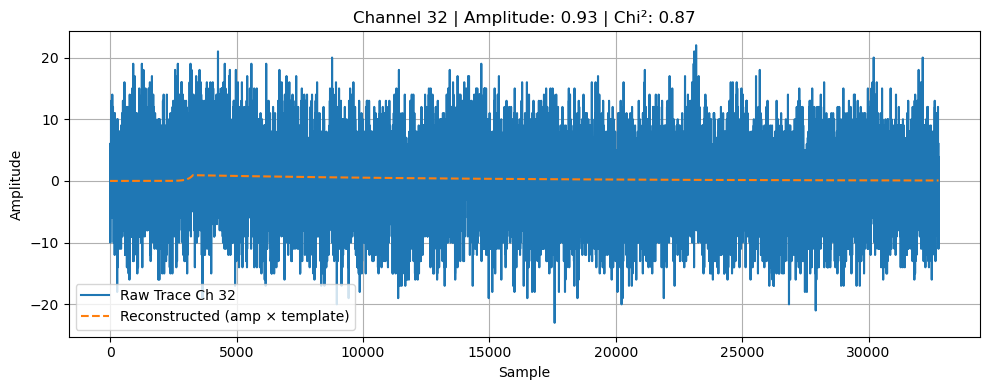

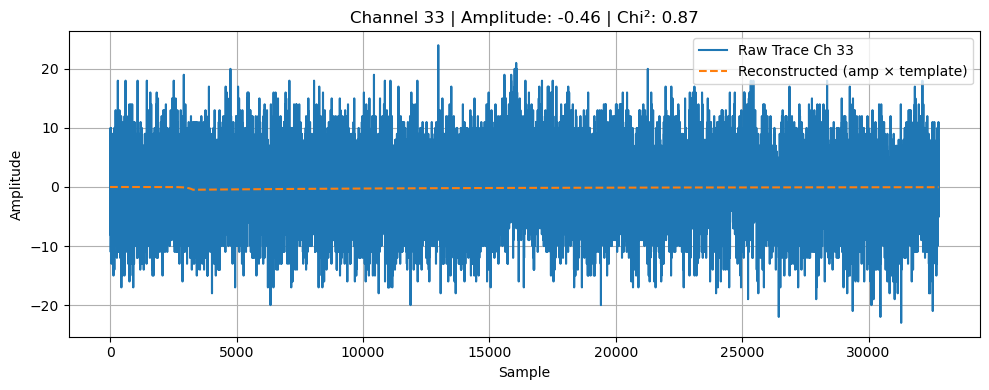

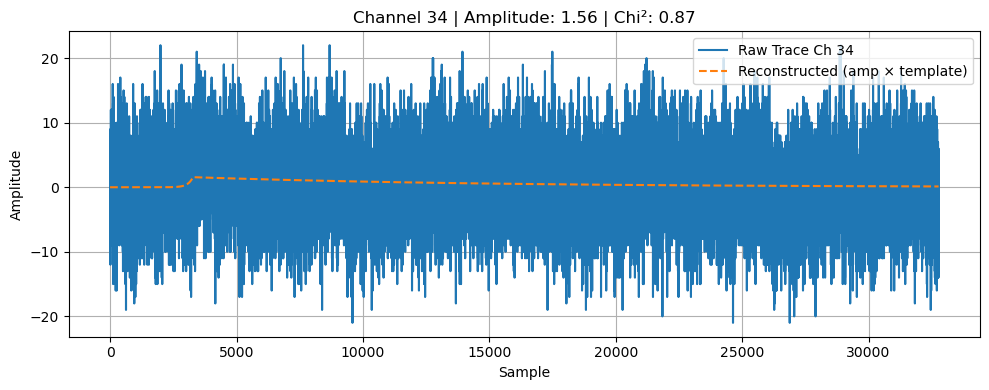

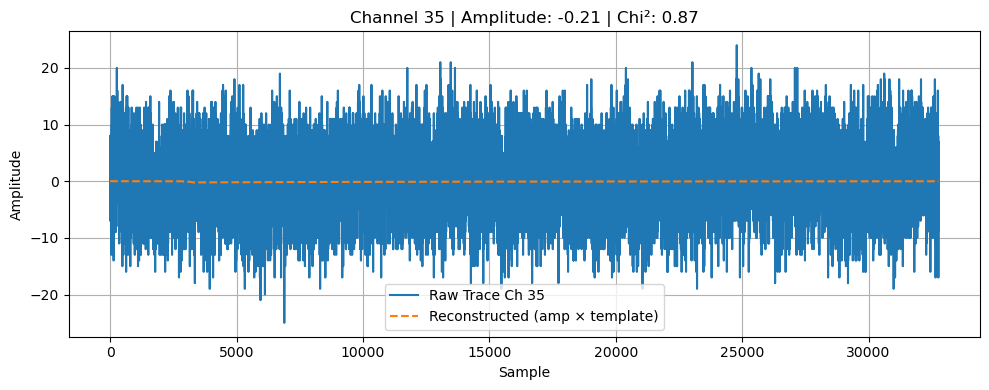

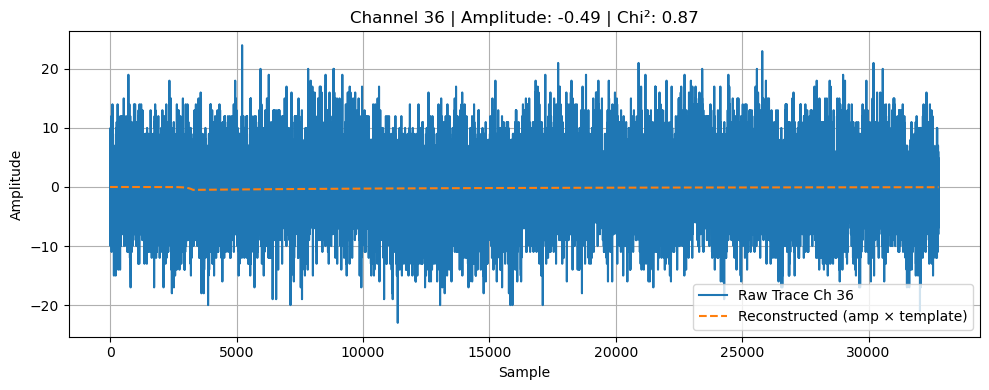

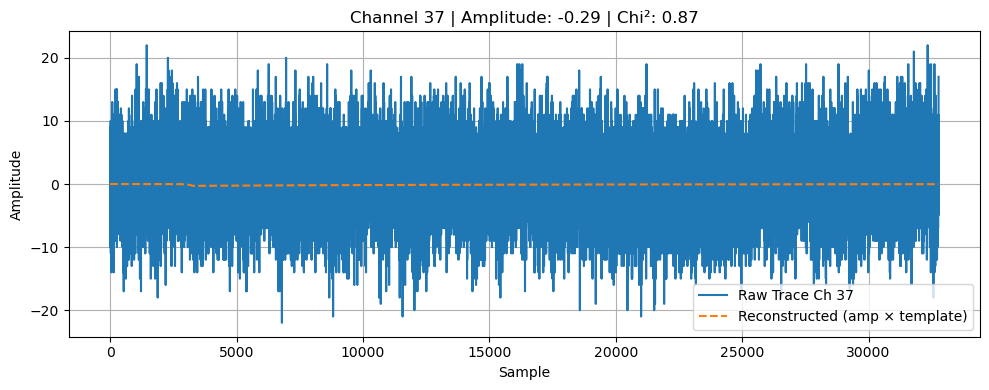

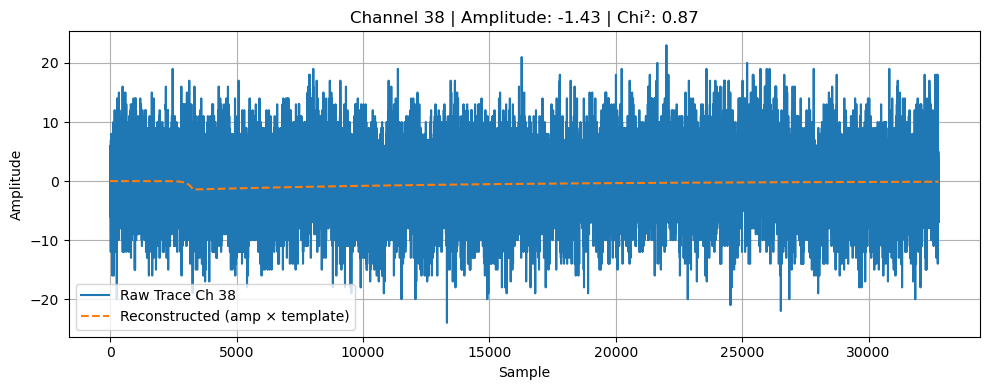

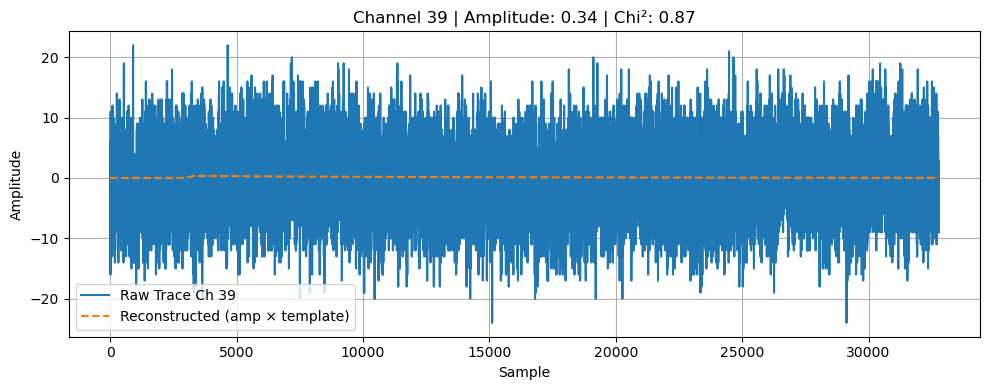

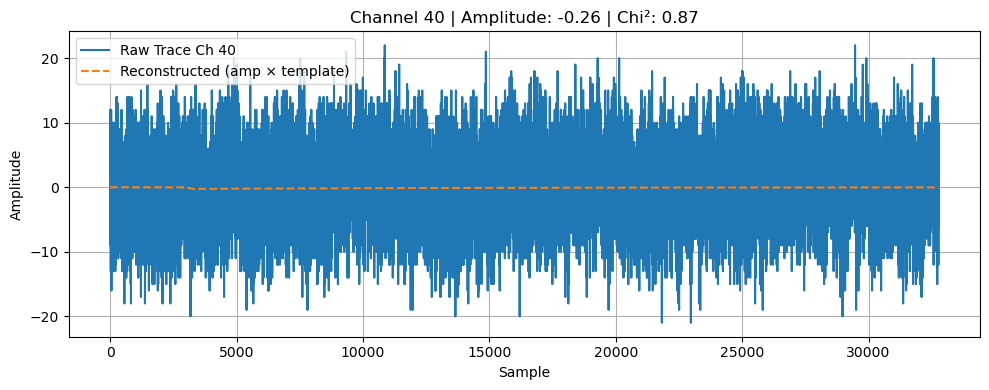

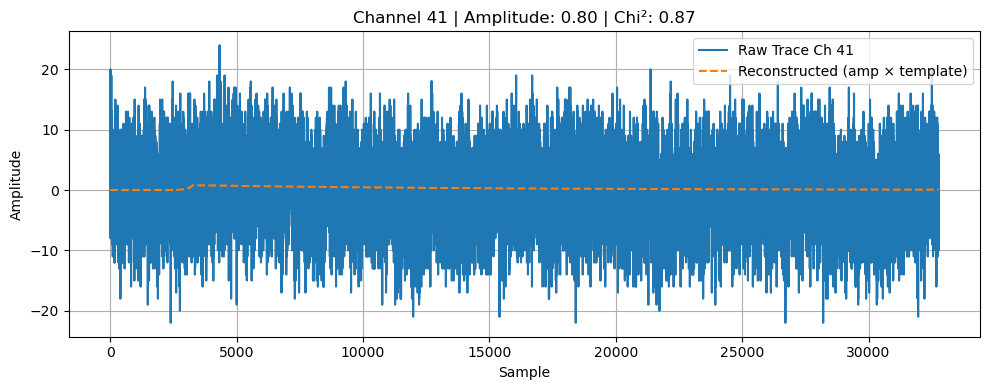

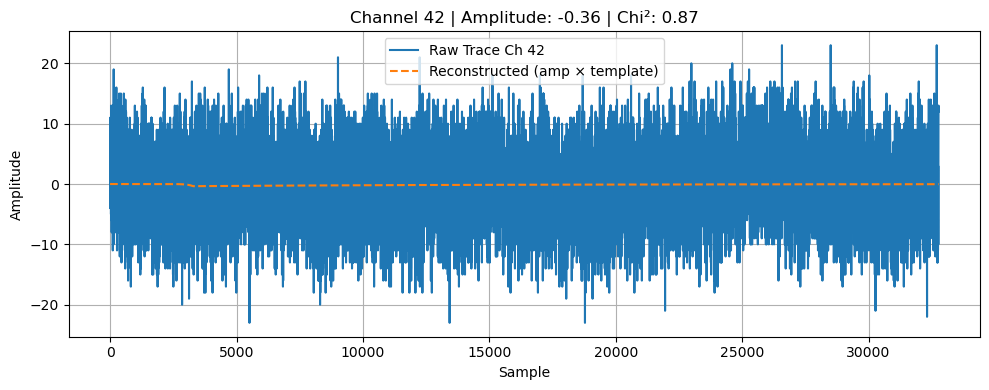

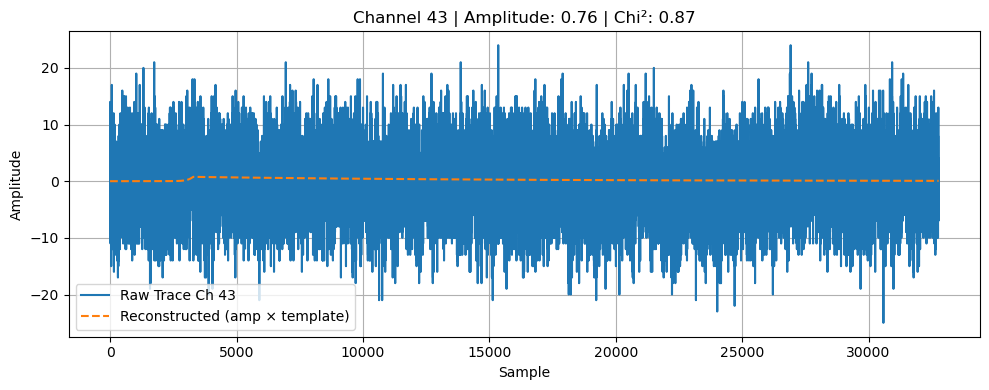

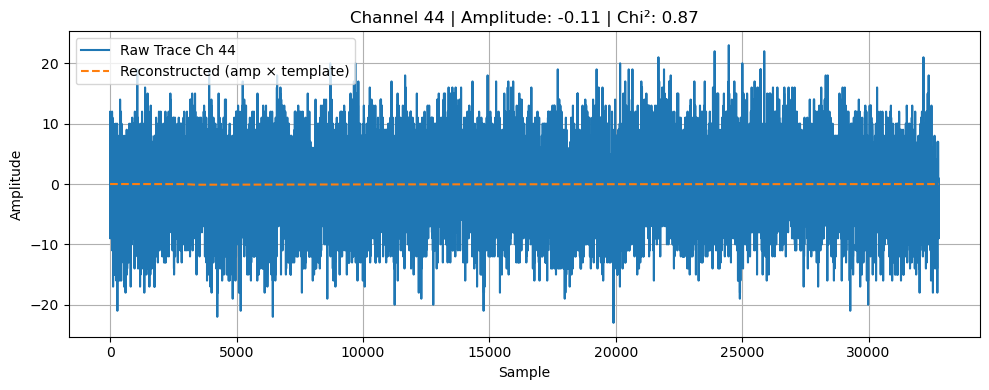

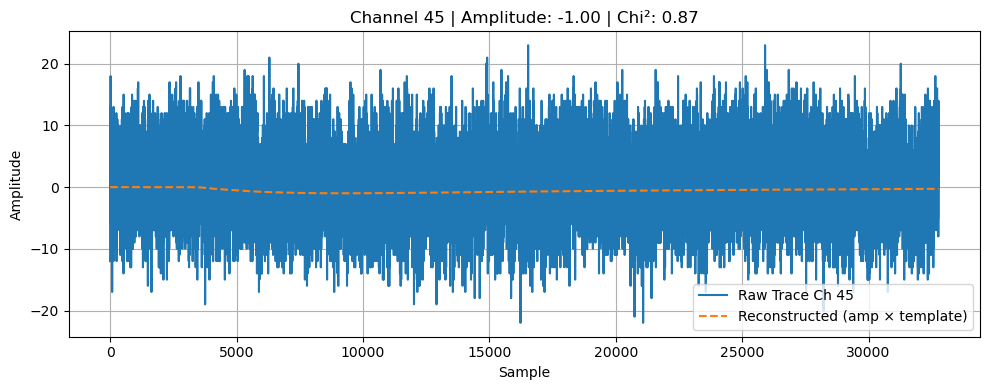

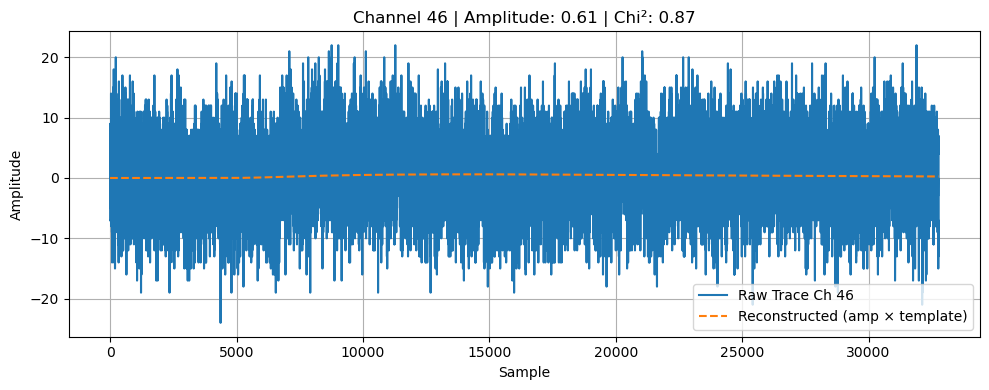

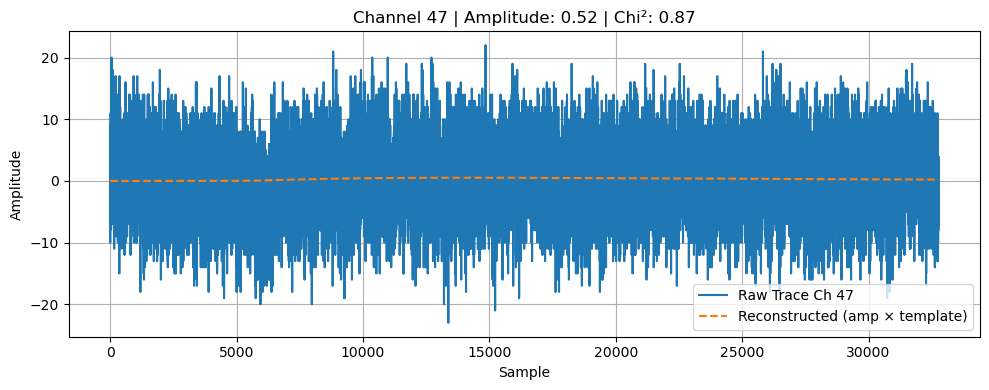

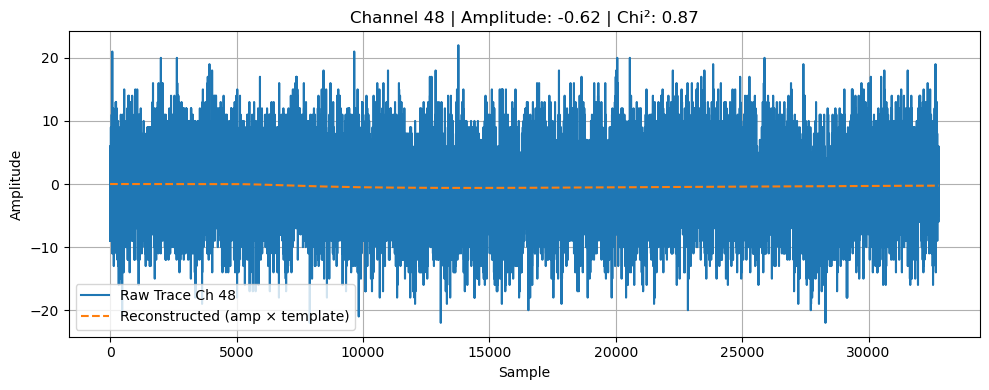

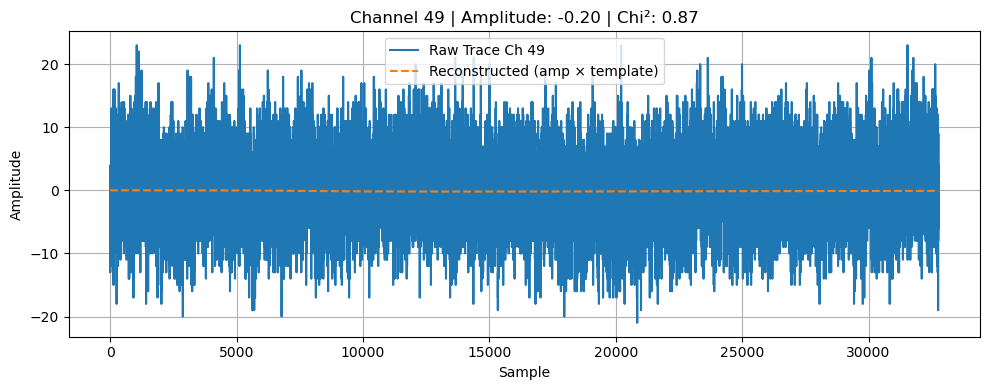

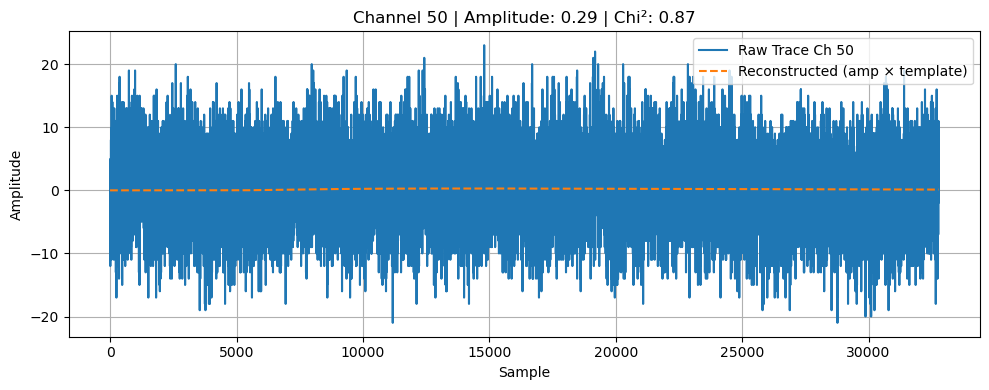

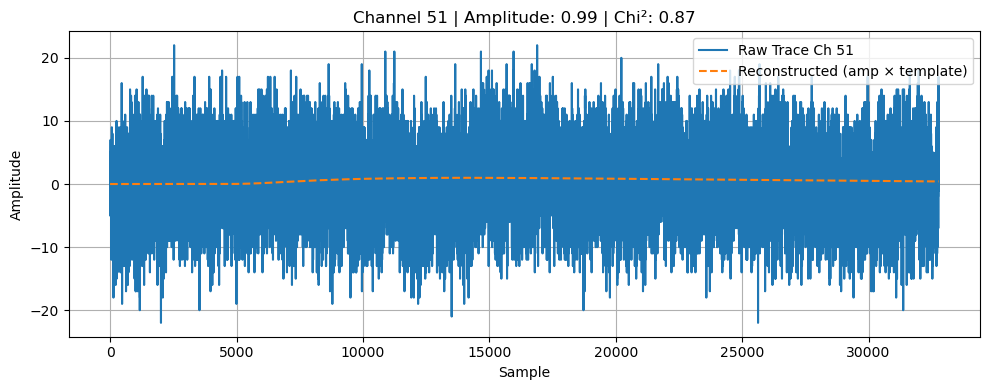

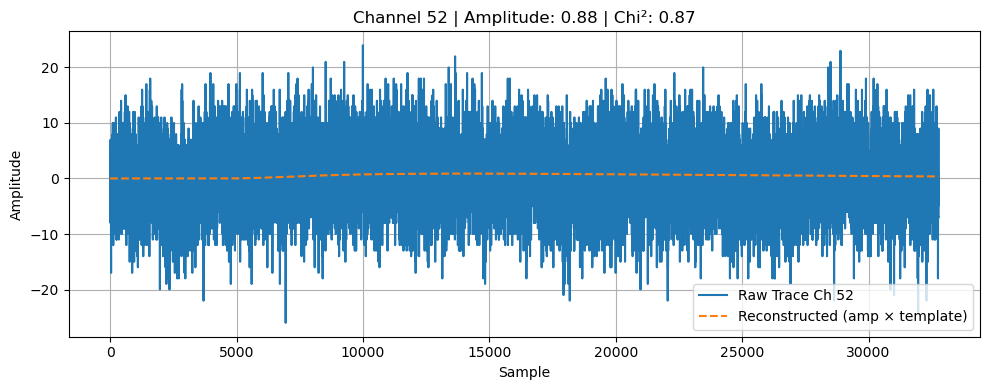

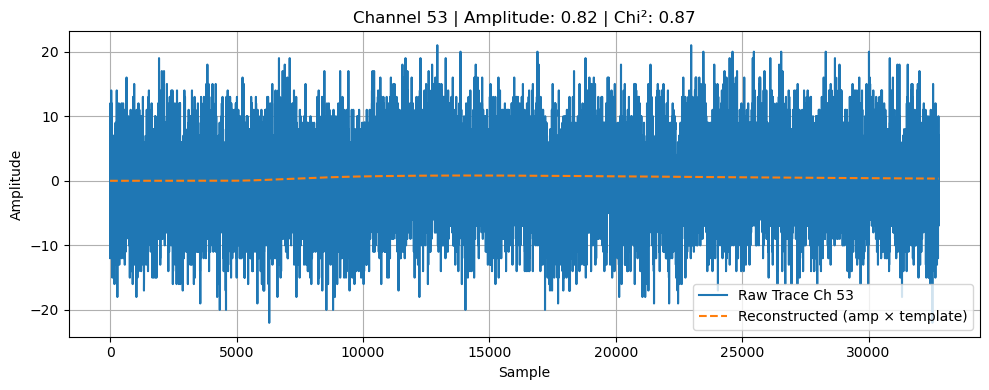

In [13]:
import matplotlib.pyplot as plt

traces = loaded_traces[0]  # shape: (54, trace_length)
amps = np.zeros(54)
chisqs = np.zeros(54)
t0s = np.zeros(54, dtype=int)

# For plotting
templates = {
    "1": trigger_1._template,
    "2": trigger_2._template,
    "3": trigger_3._template,
}

for ch in range(54):
    if ch <= 44:
        amp, chisq = trigger_1.fit(traces[ch])
        template = templates["1"]
    elif ch == 45:
        amp, chisq = trigger_2.fit(traces[ch])
        template = templates["2"]
    else:
        amp, chisq = trigger_3.fit(traces[ch])
        template = templates["3"]

    amps[ch] = amp
    chisqs[ch] = chisq

    # Plot raw trace and reconstructed signal
    plt.figure(figsize=(10, 4))
    plt.plot(traces[ch], label=f'Raw Trace Ch {ch}')
    plt.plot(amp * template, label='Reconstructed (amp × template)', linestyle='--')
    plt.title(f'Channel {ch} | Amplitude: {amp:.2f} | Chi²: {chisq:.2f}')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [14]:
amps

array([ 0.76937953,  0.09812021, -0.28247723, -0.75797394,  0.58934938,
        1.07181343,  1.51966227,  0.33501889,  0.15866543,  0.70459186,
       -0.25411384,  1.01946248,  0.43311598,  0.34037533,  0.14486186,
        0.45645593,  0.8798865 , -2.12045033,  1.41746536,  0.0569839 ,
       -0.79516333, -0.94391064,  3.7765602 , -0.95010892, -0.10814343,
        0.31680777, -0.52137448, -0.8814996 , -0.40282655, -0.36988261,
        0.70649679, -0.63048641,  0.93481746, -0.46437773,  1.55969298,
       -0.21300327, -0.485938  , -0.28884005, -1.42619631,  0.34169327,
       -0.25669957,  0.8042419 , -0.35626695,  0.76471143, -0.11401053,
       -0.99855327,  0.60865609,  0.52358256, -0.62013496, -0.1954682 ,
        0.29159318,  0.99033581,  0.88162676,  0.82090925])

In [15]:
chisqs

array([0.87086302, 0.86917568, 0.8694126 , 0.87048868, 0.869035  ,
       0.87085581, 0.87182645, 0.87196753, 0.87033868, 0.87019258,
       0.86972891, 0.8724484 , 0.87049043, 0.87039603, 0.87120167,
       0.87088474, 0.870216  , 0.87133126, 0.86994171, 0.87061673,
       0.87188544, 0.87082012, 0.87526253, 0.8709249 , 0.87029136,
       0.87067107, 0.86986714, 0.87066144, 0.87256874, 0.87106259,
       0.87041345, 0.87165899, 0.87199037, 0.87015265, 0.8692583 ,
       0.87014992, 0.86949277, 0.87002809, 0.87114017, 0.8723326 ,
       0.87221083, 0.87123224, 0.87019377, 0.87171999, 0.87090109,
       0.87150629, 0.87114324, 0.87122386, 0.87075143, 0.87074743,
       0.87106978, 0.8698218 , 0.87150416, 0.87078004])

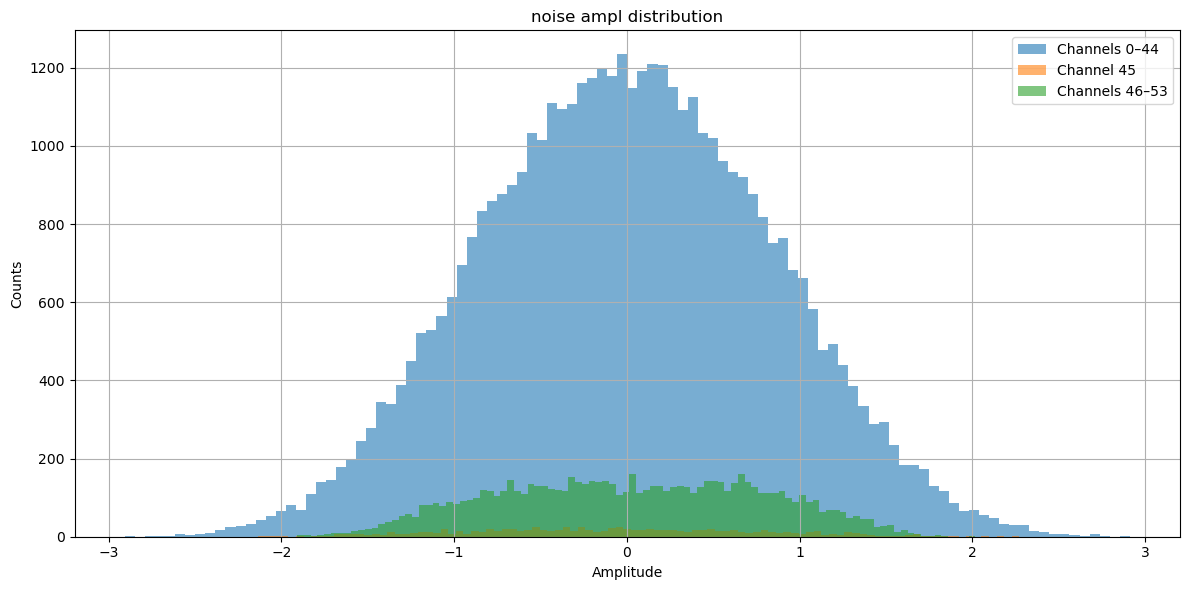

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# loaded_traces should be shape (1000, 54, trace_length)
n_events = len(loaded_traces)
amps_all = np.zeros((n_events, 54))
chisqs_all = np.zeros((n_events, 54))

for i in range(n_events):
    traces = loaded_traces[i]
    for ch in range(54):
        if ch <= 44:
            amp, chisq = trigger_1.fit(traces[ch])
        elif ch == 45:
            amp, chisq = trigger_2.fit(traces[ch])
        else:
            amp, chisq = trigger_3.fit(traces[ch])

        amps_all[i, ch] = amp
        chisqs_all[i, ch] = chisq

# Group amplitude data by channel ranges
amps_sub = amps_all[:, :45].flatten()     # Channels 0–44
amps_45 = amps_all[:, 45]
amps_46plus = amps_all[:, 46:].flatten()  # Channels 46–53

# Plot histograms
plt.figure(figsize=(12, 6))

plt.hist(amps_sub, bins=100, alpha=0.6, label='Channels 0–44')
plt.hist(amps_45, bins=100, alpha=0.6, label='Channel 45')
plt.hist(amps_46plus, bins=100, alpha=0.6, label='Channels 46–53')

plt.xlabel('Amplitude')
plt.ylabel('Counts')
plt.title('noise ampl distribution')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
print("Amplitude stats:")
print(f"Ch 0–44:    mean = {np.mean(amps_sub):.3f}, std = {np.std(amps_sub):.3f}")
print(f"Ch 45:      mean = {np.mean(amps_45):.3f}, std = {np.std(amps_45):.3f}")
print(f"Ch 46–53:   mean = {np.mean(amps_46plus):.3f}, std = {np.std(amps_46plus):.3f}")

Amplitude stats:
Ch 0–44:    mean = -0.002, std = 0.832
Ch 45:      mean = -0.068, std = 0.843
Ch 46–53:   mean = 0.017, std = 0.761


In [18]:
print("Amplitude stats:")
print(f"Ch 0–44:    mean = {np.mean(amps_sub):.3f}, std = {np.std(amps_sub):.3f}")
print(f"Ch 45:      mean = {np.mean(amps_45):.3f}, std = {np.std(amps_45):.3f}")
print(f"Ch 46–53:   mean = {np.mean(amps_46plus):.3f}, std = {np.std(amps_46plus):.3f}")


Amplitude stats:
Ch 0–44:    mean = -0.002, std = 0.832
Ch 45:      mean = -0.068, std = 0.844
Ch 46–53:   mean = 0.017, std = 0.761


In [20]:
import pandas as pd

# Compute stats
stats = {
    "Channel Group": ["Ch 0–44", "Ch 45", "Ch 46–53"],
    "Mean": [np.mean(amps_sub), np.mean(amps_45), np.mean(amps_46plus)],
    "Std": [np.std(amps_sub), np.std(amps_45), np.std(amps_46plus)]
}

# Create DataFrame
stats_df = pd.DataFrame(stats)

# Save to CSV
stats_df.to_csv("noise_amplitude_stats.csv", index=False)

print("Amplitude statistics saved to 'noise_amplitude_stats.csv'")


Amplitude statistics saved to 'noise_amplitude_stats.csv'
